<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-28 21:26:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.0MB/s    in 2.3s    

2025-09-28 21:26:23 (66.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



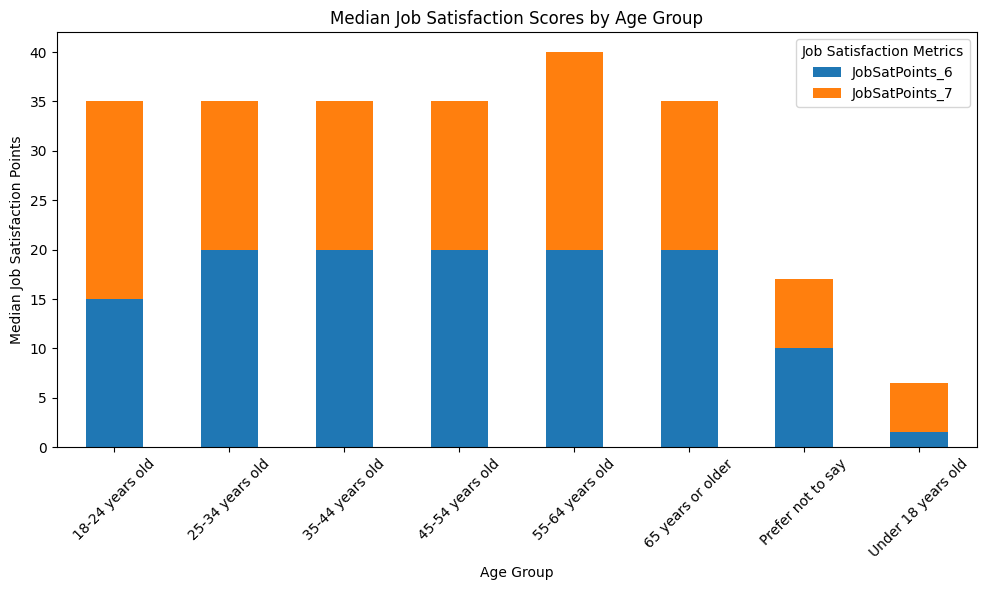

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for the relevant columns
df_age_js = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Group by Age and compute median for each JobSatPoints column
median_js = df_age_js.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Sort age groups if necessary
median_js = median_js.sort_index()  # or define a custom order if Age is categorical

# Step 4: Plot stacked bar chart
median_js.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.legend(title='Job Satisfaction Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


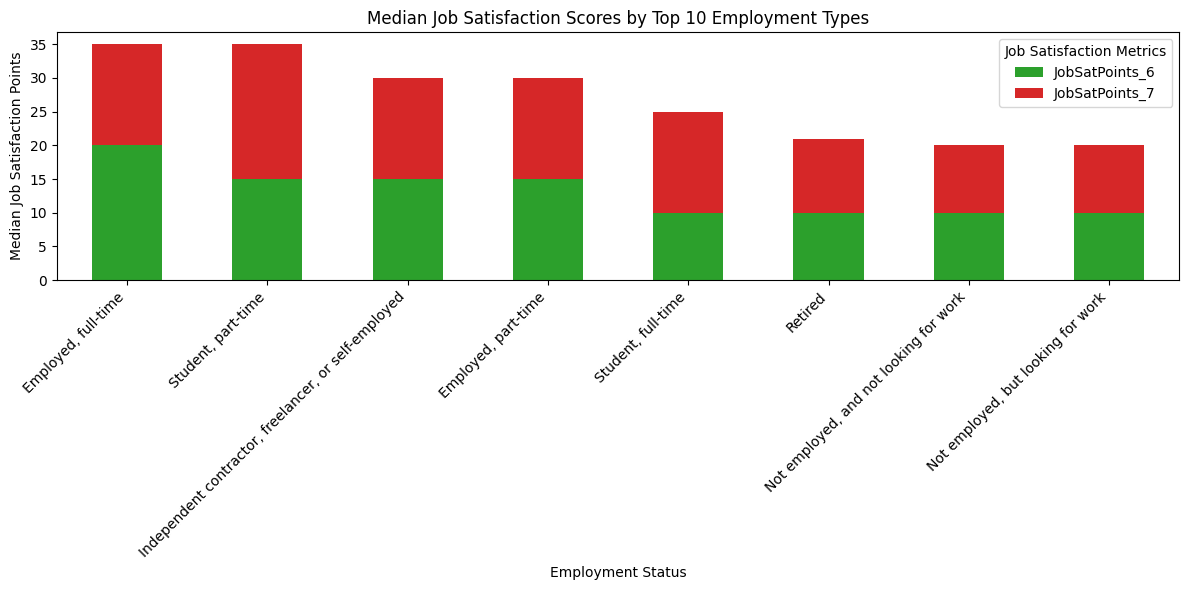

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Drop missing values for relevant columns
df_emp = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Split semicolon-separated employment types into separate rows
df_emp_split = df_emp.assign(Employment=df_emp['Employment'].str.split(';')).explode('Employment')

# Step 3: Strip extra spaces
df_emp_split['Employment'] = df_emp_split['Employment'].str.strip()

# Step 4: Get the top 10 most common employment types
top10_emp = [emp for emp, count in Counter(df_emp_split['Employment']).most_common(10)]
df_emp_top10 = df_emp_split[df_emp_split['Employment'].isin(top10_emp)]

# Step 5: Group by Employment and calculate median JobSatPoints
median_js_emp = df_emp_top10.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 6: Sort by total median satisfaction for better visualization
median_js_emp['Total'] = median_js_emp['JobSatPoints_6'] + median_js_emp['JobSatPoints_7']
median_js_emp = median_js_emp.sort_values('Total', ascending=False).drop(columns='Total')

# Step 7: Plot stacked bar chart
median_js_emp.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#2ca02c', '#d62728'])
plt.title('Median Job Satisfaction Scores by Top 10 Employment Types')
plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()



### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_1980/2389283486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_min'] = df_clean['Age'].map(lambda x: age_mapping.get(x, (None, None))[0])
/tmp/ipykernel_1980/2389283486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_max'] = df_clean['Age'].map(lambda x: age_mapping.get(x, (None, None))[1])


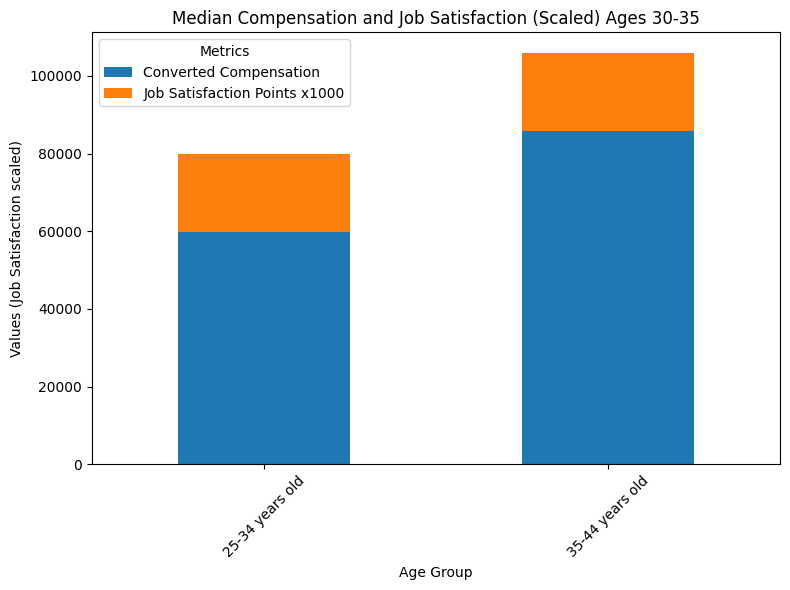

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Define Age Mapping
# -------------------------------
# Map categorical age ranges to numeric ranges
age_mapping = {
    'Under 18 years old': (0, 17),
    '18-24 years old': (18, 24),
    '25-34 years old': (25, 34),
    '35-44 years old': (35, 44),
    '45-54 years old': (45, 54),
    '55-64 years old': (55, 64),
    '65 years or older': (65, 120),
    'Prefer not to say': (None, None)
}

# -------------------------------
# Step 2: Drop missing values
# -------------------------------
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# -------------------------------
# Step 3: Map Age Categories to Numeric Ranges
# -------------------------------
df_clean['Age_min'] = df_clean['Age'].map(lambda x: age_mapping.get(x, (None, None))[0])
df_clean['Age_max'] = df_clean['Age'].map(lambda x: age_mapping.get(x, (None, None))[1])

# -------------------------------
# Step 4: Filter for Respondents Aged 30-35
# -------------------------------
df_filtered = df_clean[(df_clean['Age_max'] >= 30) & (df_clean['Age_min'] <= 35)]

# -------------------------------
# Step 5: Group by Age Category and Compute Median
# -------------------------------
median_age = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# -------------------------------
# Step 6: Plot Stacked Bar Chart
# -------------------------------
median_age_scaled = median_age.copy()
median_age_scaled['JobSatPoints_6'] = median_age_scaled['JobSatPoints_6'] * 1000  # scale factor

median_age_scaled.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Compensation and Job Satisfaction (Scaled) Ages 30-35')
plt.xlabel('Age Group')
plt.ylabel('Values (Job Satisfaction scaled)')
plt.xticks(rotation=45)
plt.legend(['Converted Compensation', 'Job Satisfaction Points x1000'], title='Metrics')
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


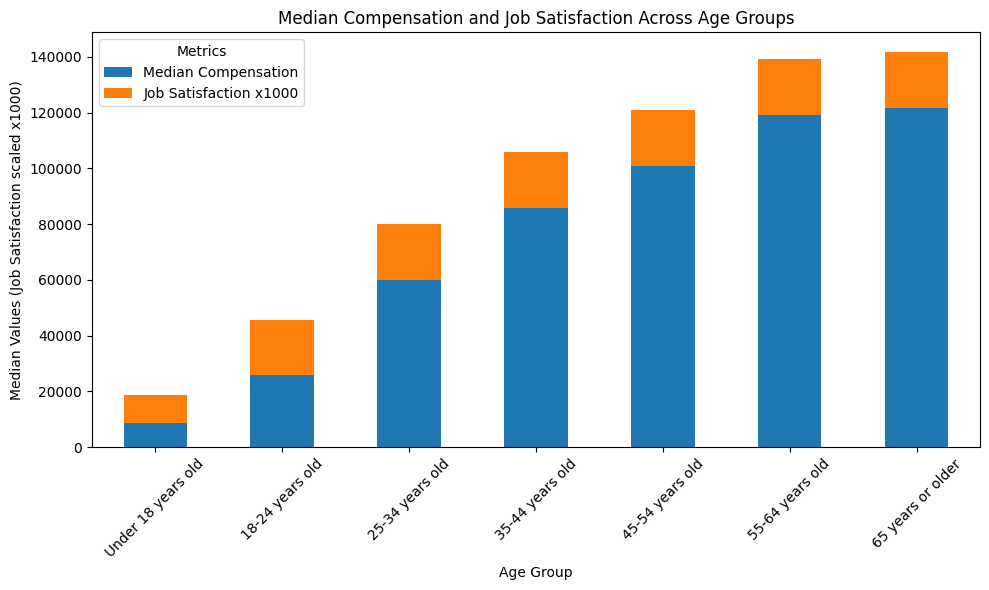

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Step 2: Group by Age category and compute median
median_age = df_clean.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 3: Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
median_age = median_age.reindex(age_order)

# Step 4: Scale Job Satisfaction for visibility (e.g., multiply by 1000)
median_age_scaled = median_age.copy()
median_age_scaled['JobSatPoints_6'] = median_age_scaled['JobSatPoints_6'] * 1000

# Step 5: Plot stacked bar chart
median_age_scaled.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Values (Job Satisfaction scaled x1000)')
plt.xticks(rotation=45)
plt.legend(['Median Compensation', 'Job Satisfaction x1000'], title='Metrics')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


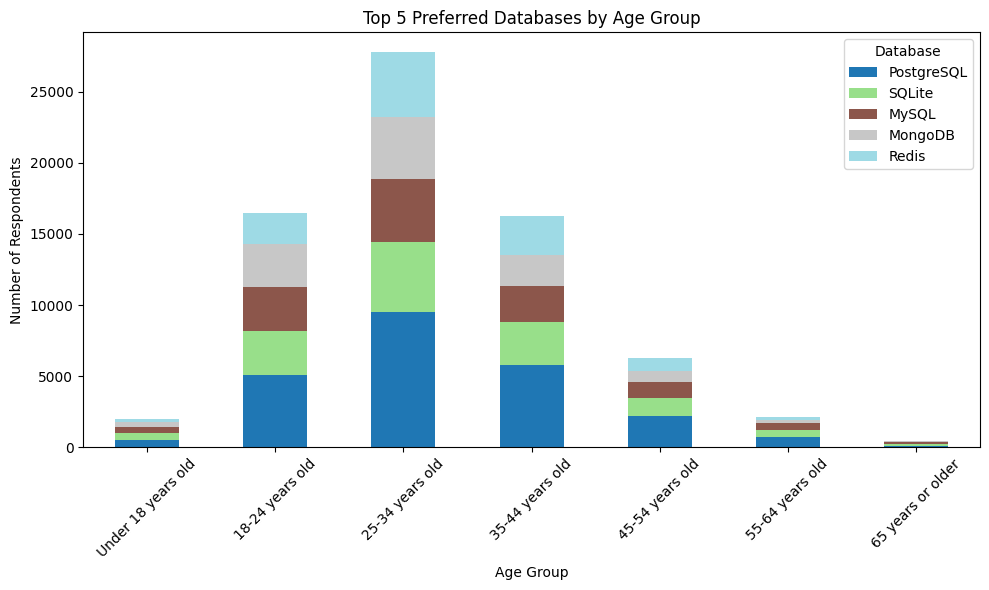

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_db = df.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

# Step 2: Split semicolon-separated databases into separate rows
df_db_split = df_db.assign(DatabaseWantToWorkWith=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Step 3: Strip extra spaces
df_db_split['DatabaseWantToWorkWith'] = df_db_split['DatabaseWantToWorkWith'].str.strip()

# Step 4: Count the frequency of each database per age group
db_counts = df_db_split.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Step 5: Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
db_counts = db_counts.reindex(age_order)

# Optional: Select top N databases overall for clarity
top_n = 5
top_dbs = db_counts.sum().sort_values(ascending=False).head(top_n).index
db_counts_top = db_counts[top_dbs]

# Step 6: Plot stacked bar chart
db_counts_top.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Top 5 Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


/tmp/ipykernel_1980/3556302785.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  js_counts = df_js_split.groupby(['Employment', 'JobSatBin']).size().unstack(fill_value=0)


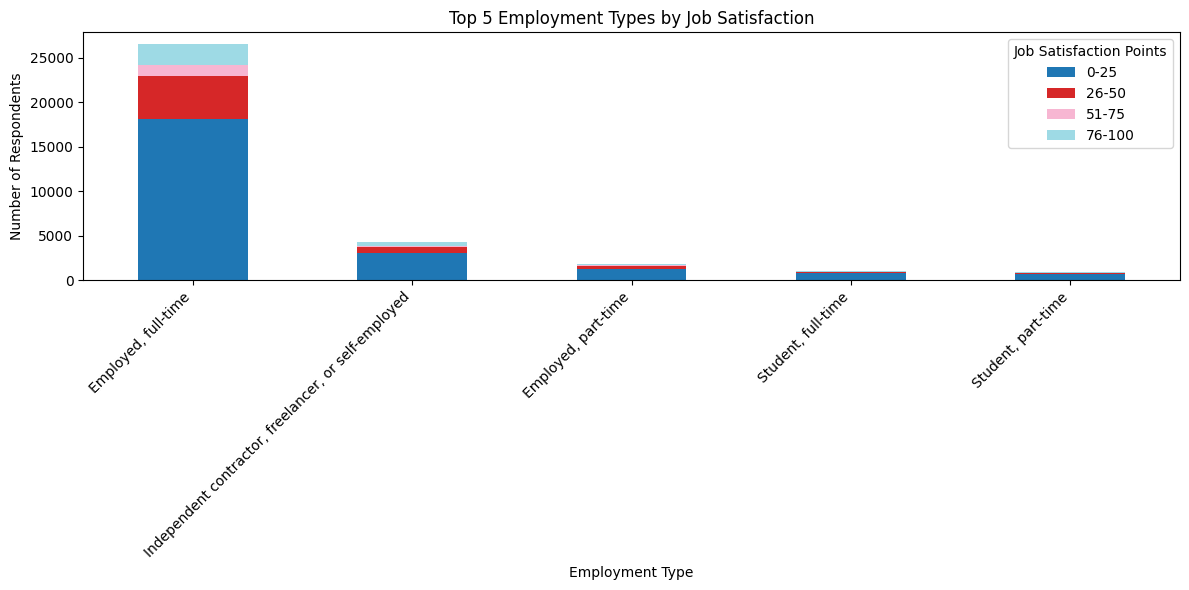

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_js = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 2: Split semicolon-separated employment types into separate rows
df_js_split = df_js.assign(Employment=df_js['Employment'].str.split(';')).explode('Employment')

# Step 3: Strip extra spaces
df_js_split['Employment'] = df_js_split['Employment'].str.strip()

# Step 4: Bin JobSatPoints_6 into categories for stacking
bins = [0, 25, 50, 75, 100]  # adjust based on your job satisfaction scale
labels = ['0-25', '26-50', '51-75', '76-100']
df_js_split['JobSatBin'] = pd.cut(df_js_split['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Step 5: Count frequency of job satisfaction bins per employment type
js_counts = df_js_split.groupby(['Employment', 'JobSatBin']).size().unstack(fill_value=0)

# Step 6: Select top 5 employment types for readability
top5_emp = js_counts.sum(axis=1).sort_values(ascending=False).head(5).index
js_counts_top = js_counts.loc[top5_emp]

# Step 7: Plot stacked bar chart
js_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Top 5 Employment Types by Job Satisfaction')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()



### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


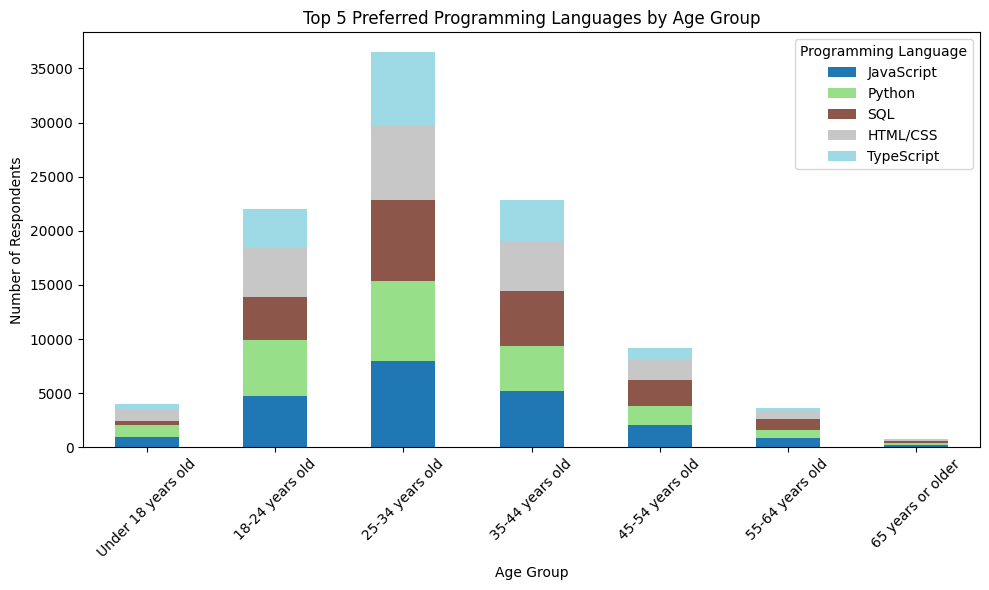

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_lang = df.dropna(subset=['Age', 'LanguageAdmired'])

# Step 2: Split semicolon-separated language entries into separate rows
df_lang_split = df_lang.assign(LanguageAdmired=df_lang['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Step 3: Strip extra spaces
df_lang_split['LanguageAdmired'] = df_lang_split['LanguageAdmired'].str.strip()

# Step 4: Count frequency of each language per age group
lang_counts = df_lang_split.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Step 5: Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
lang_counts = lang_counts.reindex(age_order)

# Step 6: Select top N languages overall for clarity
top_n = 5
top_langs = lang_counts.sum().sort_values(ascending=False).head(top_n).index
lang_counts_top = lang_counts[top_langs]

# Step 7: Plot stacked bar chart
lang_counts_top.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Top 5 Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


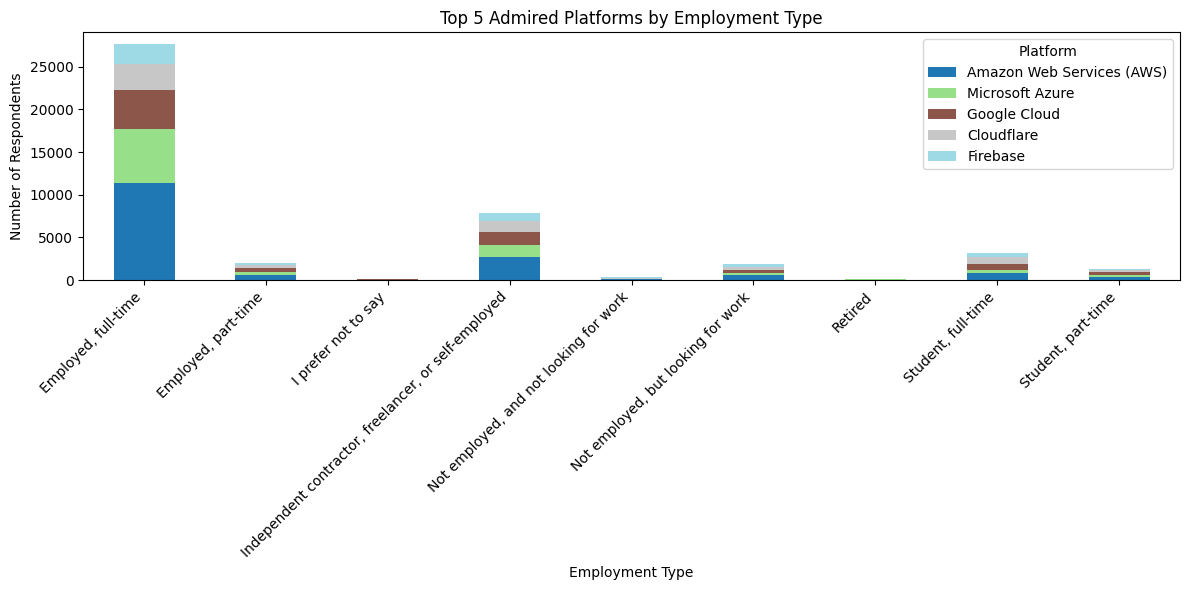

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_platform = df.dropna(subset=['Employment', 'PlatformAdmired'])

# Step 2: Split semicolon-separated employment types and platforms into separate rows
df_platform_split = df_platform.assign(
    Employment=df_platform['Employment'].str.split(';'),
    PlatformAdmired=df_platform['PlatformAdmired'].str.split(';')
).explode('Employment').explode('PlatformAdmired')

# Step 3: Strip extra spaces
df_platform_split['Employment'] = df_platform_split['Employment'].str.strip()
df_platform_split['PlatformAdmired'] = df_platform_split['PlatformAdmired'].str.strip()

# Step 4: Count frequency of each platform per employment type
platform_counts = df_platform_split.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Step 5: Select top 5 platforms overall
top5_platforms = platform_counts.sum().sort_values(ascending=False).head(5).index
platform_counts_top5 = platform_counts[top5_platforms]

# Step 6: Plot stacked bar chart
platform_counts_top5.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Top 5 Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()



### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
